In [1]:
import pypsa
#import data from pypower  
from pypower.api import case39, case14
ppc = case39() #try case14() for a smaller network
network = pypsa.Network()
network.import_from_pypower_ppc(ppc)



network.determine_network_topology()
for sub_network in network.sub_networks.obj:
    pypsa.pf.calculate_B_H(sub_network)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
#printing only the relevant part of the buses dataframe
#namely the buses indices and the power they consume
sub_network.buses()[["Pd"]]

,Pd
1,97.60
2,0.00
3,322.00
4,500.00
5,0.00
6,0.00
7,233.80
8,522.00
9,6.50
10,0.00


In [3]:
#print the list of generators
generators = network.generators["bus"]
print(generators)

G0    30
G1    31
G2    32
G3    33
G4    34
G5    35
G6    36
G7    37
G8    38
G9    39
Name: bus, dtype: object


In [4]:
baseMVA=100
lines = sub_network.branches()
lines.bus0 = lines.bus0.astype(int) #transforms bus0 into an integer (it was a string)
lines.bus1 = lines.bus1.astype(int) #transforms bus1 into an integer (it was a string)
lines.sort_values(by=['bus0','bus1'], inplace=True) #sort the network lines based on buses they connect
lines["susceptances"] = list(1/(baseMVA*lines["x_pu_eff"])) #susceptance calculated and added to the dataframe
lines[["bus0","bus1","susceptances"]] #printing only the relevant part of the dataframe

bus0  bus1  susceptances
Line        L0      1     2     24.330900
            L1      1    39     40.000000
            L2      2     3     66.225166
            L3      2    25    116.279070
Transformer T0      2    30     53.901091
Line        L4      3     4     46.948357
            L5      3    18     75.187970
            L6      4     5     78.125000
            L7      4    14     77.519380
            L8      5     6    384.615385
            L9      5     8     89.285714
            L10     6     7    108.695652
            L11     6    11    121.951220
Transformer T1      6    31     37.383178
Line        L12     7     8    217.391304
            L13     8     9     27.548209
            L14     9    39     40.000000
            L15    10    11    232.558140
            L16    10    13    232.558140
Transformer T2     10    32     46.728972
            T3     12    11     22.851397
            T4     12    13     22.851397
Line        L17    13    14     99.009901
            L18    14    15     46.082949
            L19    15    16    106.382979
            L20    16    17    112.359551
            L21    16    19     51.282051
            L22    16    21     74.074074
            L23    16    24    169.491525
            L24    17    18    121.951220
            L25    17    27     57.803468
Transformer T5     19    20     68.362045
            T6     19    33     65.815453
            T7     20    34     55.060015
Line        L26    21    22     71.428571
            L27    22    23    104.166667
Transformer T8     22    35     68.224458
Line        L28    23    24     28.571429
            L29    23    36     36.764706
            L30    25    26     30.959752
Transformer T9     25    37     42.052145
Line        L31    26    27     68.027211
            L32    26    28     21.097046
            L33    26    29     16.000000
            L34    28    29     66.225166
Transformer T10    29    38     62.539087

# Transform the pypsa network object to the networkx network object

In [5]:
import networkx as nx
import numpy as np
#to show the full matrix
import sys
np.set_printoptions(threshold=sys.maxsize)


subset = df_lines[["bus0","bus1"]]
edge_tuples = [tuple(x) for x in subset.to_numpy()]

In [17]:
df_buses = sub_network.buses()[["Pd"]]
df_lines = lines[["bus0","bus1","susceptances"]]

n = df_buses.shape[0]#the number of nodes/buses
m = df_lines.shape[0]#the number of edges/lines

node_list =  np.arange(n)+1
#convert dataframe to tuples in order to be used to generate edges
weighted_edge_tuples = [tuple(x) for x in df_lines.to_numpy()]
# print(edge_tuples)


#generate the networkx object
G = nx.DiGraph()
G.add_nodes_from(node_list)
# G.add_edges_from(edge_tuples)
G.add_weighted_edges_from(weighted_edge_tuples)
unG = nx.Graph(G)

# Examine the network

In [18]:
#show dimensions of the network
print("The number of case39's nodes is "+ str(G.number_of_nodes())+".")
print("The number of case39's edges is "+ str(G.number_of_edges())+".")

#examine elements of the network
print(list(G.edges))



The number of case39's nodes is 39.
The number of case39's edges is 46.
[(1, 2.0), (1, 39.0), (2, 3.0), (2, 25.0), (2, 30.0), (3, 4.0), (3, 18.0), (4, 5.0), (4, 14.0), (5, 6.0), (5, 8.0), (6, 7.0), (6, 11.0), (6, 31.0), (7, 8.0), (8, 9.0), (9, 39.0), (10, 11.0), (10, 13.0), (10, 32.0), (12, 11.0), (12, 13.0), (13, 14.0), (14, 15.0), (15, 16.0), (16, 17.0), (16, 19.0), (16, 21.0), (16, 24.0), (17, 18.0), (17, 27.0), (19, 20.0), (19, 33.0), (20, 34.0), (21, 22.0), (22, 23.0), (22, 35.0), (23, 24.0), (23, 36.0), (25, 26.0), (25, 37.0), (26, 27.0), (26, 28.0), (26, 29.0), (28, 29.0), (29, 38.0)]


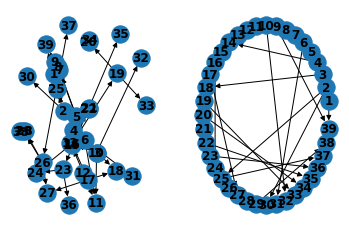

In [19]:
#draw the network (test)
import matplotlib.pyplot as plt
Gtest = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(n, 2*n+1), range(n+1)],with_labels=True, font_weight='bold')



plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


# Calculate the kron reduced network

In [47]:
from numpy.linalg import inv
def kron_reduction(A, ngnr):
    L = np.diag(np.squeeze(np.asarray(np.sum(A,axis = 0))))-A
    redL = L[(n-ngnr):n,(n-ngnr):n] - np.transpose(L[:n-ngnr,n-ngnr:n])@inv(L[:n-ngnr,:n-ngnr])@L[:n-ngnr,n-ngnr:n]
    redA = -redL
    np.fill_diagonal(redA, 0)
    return redL, redA 

In [49]:
#partition the Laplacian matrix
# print(generators)
ngnr = generators.shape[0]
A = nx.to_numpy_matrix(unG)
redL,redA = kron_reduction(A,ngnr)
print(redL)
print(redA)

[[ 32.19339596  -2.24077412  -2.53804929  -1.83375379  -0.84971196
   -1.97837115  -1.10734538 -11.4337488   -3.17111386  -7.0405276 ]
 [ -2.24077412  24.34176732  -9.78362621  -1.46126519  -0.6771108
   -1.57650656  -0.8824114   -1.33259746  -0.79623472  -5.59124086]
 [ -2.53804929  -9.78362621  25.7907586   -2.04017565  -0.94536227
   -2.20107229  -1.23199695  -1.53776482  -0.98920455  -4.52350657]
 [ -1.83375379  -1.46126519  -2.04017565  32.10610533 -15.62000109
   -4.7048095   -2.63340327  -1.32379253  -1.36949665  -1.11940767]
 [ -0.84971196  -0.6771108   -0.94536227 -15.62000109  23.25921633
   -2.18008159  -1.22024792  -0.61340969  -0.63458774  -0.51870327]
 [ -1.97837115  -1.57650656  -2.20107229  -4.7048095   -2.18008159
   30.63199579 -13.87777293  -1.42819225  -1.47750078  -1.20768875]
 [ -1.10734538  -0.8824114   -1.23199695  -2.63340327  -1.22024792
  -13.87777293  23.25554375  -0.79939605  -0.82699531  -0.67597456]
 [-11.4337488   -1.33259746  -1.53776482  -1.32379253  -

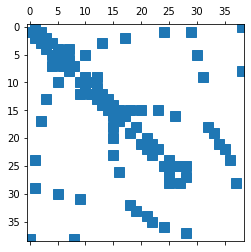

In [23]:
#visualize the adjacent matrix
import scipy.sparse as sparse
sparseA = sparse.csr_matrix(A)
plt.spy(sparseA)